In [5]:
import tensorflow as tf

In [15]:
var = tf.random.uniform([1])
print(var.numpy())

[0.8747183]


In [89]:
def data_creation(w=0.1, b=0.5, n=100):
    X = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(n,), mean=0.0, stddev=0.01)
    Y = X*w + b + noise
    return X.numpy(), Y.numpy()

X, Y = data_creation(n=100)

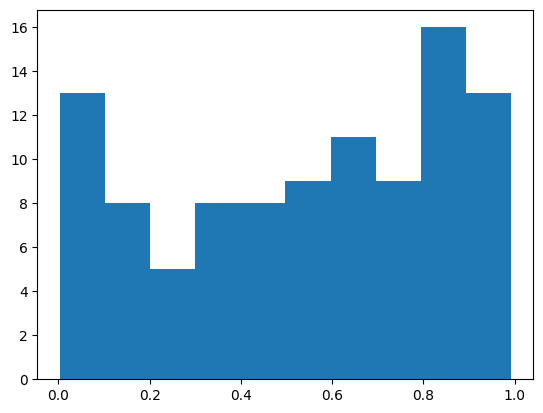

In [90]:
%matplotlib inline
import matplotlib.pyplot as mpl
mpl.hist(X)
mpl.show()

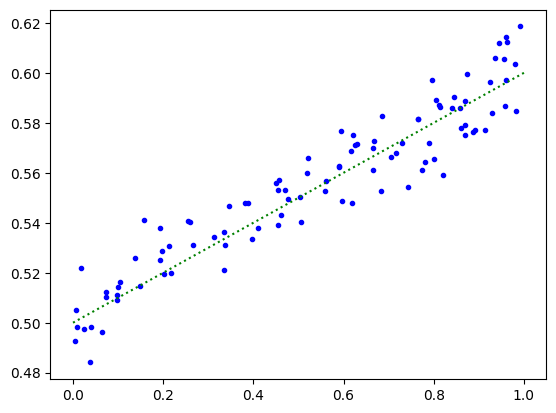

In [91]:
w = 0.1
b=0.5
mpl.plot(X, Y, 'b.')
mpl.plot([0,1], [0*w+b,1*w+b], 'g:')

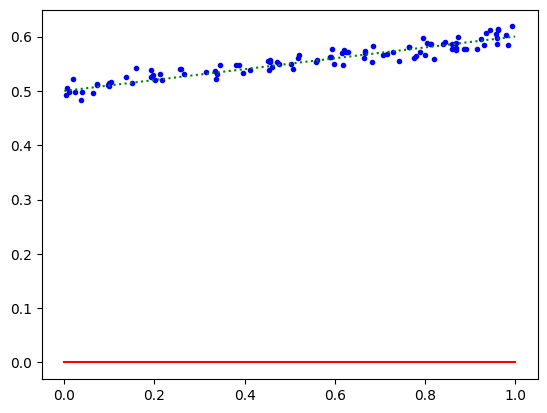

In [92]:
w_guess = 0.0
b_guess = 0.0
mpl.plot(X, Y, 'b.')
mpl.plot([0,1], [0*w+b,1*w+b], 'g:')
mpl.plot([0,1], [0*w_guess+b_guess,1*w_guess+b_guess], 'r')

In [98]:
def predict(x, w=w, b=b):
    y = w*x + b
    return y

In [94]:
def mean_squared_error(y_pred, Y):
    return tf.reduce_mean(tf.square(y_pred-Y))

In [95]:
print(mean_squared_error(predict(X), Y))

tf.Tensor(0.31010842, shape=(), dtype=float32)


In [96]:
w_guess = 0.1
b_guess = 0.5
print(mean_squared_error(predict(X), Y))

tf.Tensor(0.000108406326, shape=(), dtype=float32)


In [97]:
w_guess = 1
b_guess = -5
print(mean_squared_error(predict(X), Y))

tf.Tensor(25.200085, shape=(), dtype=float32)


In [127]:
w = tf.Variable(0.0)
b = tf.Variable(-1.0)

learning_rate = 0.9
steps = 3

for step in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X, w=w, b=b)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w,b])

    w.assign_sub(gradients[0]*learning_rate)
    b.assign_sub(gradients[1]*learning_rate)

    if step%20==0:
        print("Step: {}".format(step))

Step: 0


In [128]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.2421556>

In [129]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.2818396>

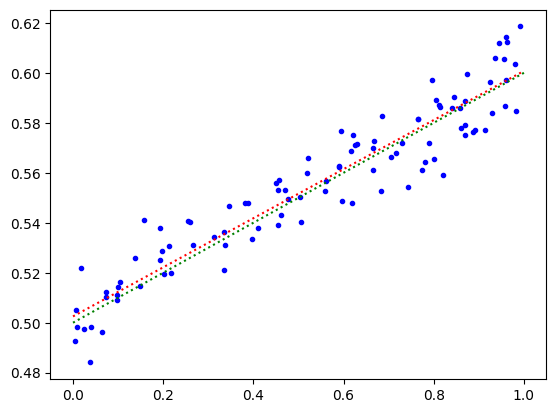

In [110]:
w_true = 0.1
b_true = 0.5
mpl.plot(X, Y, 'b.')
mpl.plot([0,1], [0*w+b,1*w+b], 'r:')
mpl.plot([0,1], [0*w_true+b_true,1*w_true+b_true], 'g:')